## Group Members
### 1. Cheki Lhamo
### 2. Nar Bdr Kharka
### 3. Ngawang Yeshi

In [1]:
import pandas as pd

In [2]:
df=pd.read_table("Adult.data", delimiter = ",", names=['age', 'workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country', 'y'])
df.head()

age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country       y  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [3]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
y                 0
dtype: int64

In [4]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
y                 object
dtype: object

In [5]:
df.info

<bound method DataFrame.info of        age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   

In [6]:
df.duplicated().sum()

24

In [7]:
df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

In [9]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [10]:
df['native_country'] = df['native_country'].replace("?", df.native_country.mode)
df['workclass'] = df['workclass'].replace("?", df.workclass.mode)
df['occupation'] = df['occupation'].replace("?", df.occupation.mode)

C:\Users\Cheki\AppData\Local\Temp/ipykernel_12280/2444516338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['native_country'] = df['native_country'].replace("?", df.native_country.mode)
C:\Users\Cheki\AppData\Local\Temp/ipykernel_12280/2444516338.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['workclass'] = df['workclass'].replace("?", df.workclass.mode)
C:\Users\Cheki\AppData\Local\Temp/ipykernel_12280/2444516338.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [11]:
df.native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [12]:
categorical_features = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
cdf = df[categorical_features]
cdf.head()

workclass   education       marital_status          occupation  \
0          State-gov   Bachelors        Never-married        Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2            Private     HS-grad             Divorced   Handlers-cleaners   
3            Private        11th   Married-civ-spouse   Handlers-cleaners   
4            Private   Bachelors   Married-civ-spouse      Prof-specialty   

     relationship    race      sex  native_country  
0   Not-in-family   White     Male   United-States  
1         Husband   White     Male   United-States  
2   Not-in-family   White     Male   United-States  
3         Husband   Black     Male   United-States  
4            Wife   Black   Female            Cuba

In [13]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
cdf_encoded = oe.fit_transform(cdf)

In [14]:
cdf_final = pd.DataFrame(data = cdf_encoded, columns = categorical_features)
cdf_final.head()

workclass  education  marital_status  occupation  relationship  race  sex  \
0        7.0        9.0             4.0         1.0           1.0   4.0  1.0   
1        6.0        9.0             2.0         4.0           0.0   4.0  1.0   
2        4.0       11.0             0.0         6.0           1.0   4.0  1.0   
3        4.0        1.0             2.0         6.0           0.0   2.0  1.0   
4        4.0        9.0             2.0        10.0           5.0   2.0  0.0   

   native_country  
0            39.0  
1            39.0  
2            39.0  
3            39.0  
4             5.0

In [15]:
df.head(1)

age   workclass  fnlwgt   education  education_num  marital_status  \
0   39   State-gov   77516   Bachelors             13   Never-married   

      occupation    relationship    race    sex  capital_gain  capital_loss  \
0   Adm-clerical   Not-in-family   White   Male          2174             0   

   hours_per_week  native_country       y  
0              40   United-States   <=50K

In [16]:
numerical_features = ['age','fnlwgt','education_num','capital_gain', 'capital_loss','hours_per_week']
ndf = df[numerical_features]


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ndf_scaled = sc.fit_transform(ndf)

In [18]:
ndf_final = pd.DataFrame(data=ndf_scaled, columns=numerical_features)
ndf_final.head()

age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.030390 -1.063569       1.134777      0.148292     -0.216743   
1  0.836973 -1.008668       1.134777     -0.145975     -0.216743   
2 -0.042936  0.245040      -0.420679     -0.145975     -0.216743   
3  1.056950  0.425752      -1.198407     -0.145975     -0.216743   
4 -0.776193  1.408066       1.134777     -0.145975     -0.216743   

   hours_per_week  
0       -0.035664  
1       -2.222483  
2       -0.035664  
3       -0.035664  
4       -0.035664

In [19]:
from sklearn.preprocessing import LabelEncoder
lc =  LabelEncoder()
df['y'] = lc.fit_transform(df.y)
df.head()

C:\Users\Cheki\AppData\Local\Temp/ipykernel_12280/1391264687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = lc.fit_transform(df.y)


age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  y  
0          2174             0              40   United-States  0  
1             0             0              13   United-States  0  
2             0             0              40   United-States  0  
3             0             0              40   United-States  0  
4             0             0              40            Cuba  0

In [20]:
df.y.unique()

array([0, 1])

In [21]:
y = df.y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

In [22]:
X = pd.concat([cdf_final, ndf_final], axis = 1)
X.head()

workclass  education  marital_status  occupation  relationship  race  sex  \
0        7.0        9.0             4.0         1.0           1.0   4.0  1.0   
1        6.0        9.0             2.0         4.0           0.0   4.0  1.0   
2        4.0       11.0             0.0         6.0           1.0   4.0  1.0   
3        4.0        1.0             2.0         6.0           0.0   2.0  1.0   
4        4.0        9.0             2.0        10.0           5.0   2.0  0.0   

   native_country       age    fnlwgt  education_num  capital_gain  \
0            39.0  0.030390 -1.063569       1.134777      0.148292   
1            39.0  0.836973 -1.008668       1.134777     -0.145975   
2            39.0 -0.042936  0.245040      -0.420679     -0.145975   
3            39.0  1.056950  0.425752      -1.198407     -0.145975   
4             5.0 -0.776193  1.408066       1.134777     -0.145975   

   capital_loss  hours_per_week  
0     -0.216743       -0.035664  
1     -0.216743       -2.222483  
2     -0.216743       -0.035664  
3     -0.216743       -0.035664  
4     -0.216743       -0.035664

In [23]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5 , shuffle = True, stratify = y)
x_test.shape

(6508, 14)

In [24]:
y_test.shape

(6508,)

In [25]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(fit_intercept=True)
model.fit(x_train, y_train)

C:\Users\Cheki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
model.score(x_train,y_train)

0.8246955319067194

In [27]:
ypred = model.predict(x_test)
ypred

array([0, 0, 0, ..., 0, 0, 0])

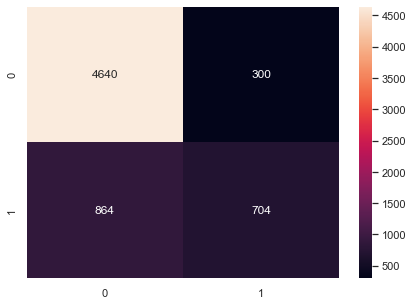

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test, ypred)
corr=df.corr()
sns.set(rc={'figure.figsize':(7,5)})
sns.heatmap(cm,annot=True, fmt='g')
plt.show()

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, ypred)

0.8211432083589428

In [30]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4940
           1       0.70      0.45      0.55      1568

    accuracy                           0.82      6508
   macro avg       0.77      0.69      0.72      6508
weighted avg       0.81      0.82      0.81      6508



In [31]:
print(precision_score(y_test,ypred,average = "micro"))

0.8211432083589428


In [32]:
print(recall_score(y_test,ypred,average = "micro"))

0.8211432083589428


In [33]:
print(f1_score(y_test,ypred,average="micro"))

0.8211432083589428


In [34]:
from sklearn.tree import DecisionTreeClassifier
model_d=DecisionTreeClassifier()
model_d.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
model_d.score(x_train,y_train)

0.9999615813131507

In [36]:
y_test_pred = model_d.predict(x_test)
y_test_pred

array([0, 0, 0, ..., 0, 0, 1])

In [37]:
model_d.score(x_test,y_test_pred)

1.0

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.8149969268592502

In [39]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4940
           1       0.61      0.63      0.62      1568

    accuracy                           0.81      6508
   macro avg       0.75      0.75      0.75      6508
weighted avg       0.82      0.81      0.82      6508



In [40]:
print(precision_score(y_test,y_test_pred,average = "micro"))

0.8149969268592502


In [41]:
print(recall_score(y_test,y_test_pred,average = "micro"))

0.8149969268592502


In [42]:
print(f1_score(y_test,y_test_pred,average="micro"))

0.8149969268592502


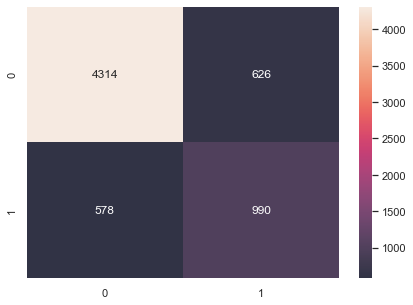

In [43]:
cm=confusion_matrix(y_test, y_test_pred)
corr=df.corr()
sns.set(rc={'figure.figsize':(7,5)})
sns.heatmap(cm,annot=True, alpha = 0.8, fmt="d")
plt.show()